In [1]:
!pip install sklearn

In [2]:
from __future__ import print_function
import random as rand
import csv
import operator
import gc
import os
from datetime import datetime
from keras.callbacks import EarlyStopping
from keras.models import load_model
import keras.backend as K
from sklearn.metrics import log_loss
import numpy as np

if K.backend() == 'tensorflow':
    import tensorflow as tf
from setuptools import setup, find_packages

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import backend as K
#from devol import DEvol, GenomeHandler
import pandas as pd
from pyspark.sql.types import *
import inspect
from typing import Callable, List
import pandas as pd
from pyspark.sql import DataFrame, Row, column
from pyspark.sql.functions import lit, pandas_udf, PandasUDFType, array
from pyspark.sql.types import FloatType

/home/djg/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


# DEvol On MNIST Results
### Genome Record

In [9]:
# File location and type
file_location = "./Fri Dec 4 20 54 56 2020.csv"
file_type = "parquet"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = pd.read_csv(file_location, sep = delimiter).head(n=300)

display(df)


,Conv0 active,Conv0 num filters,Conv0 batch normalization,Conv0 activation,Conv0 dropout,Conv0 max pooling,Conv1 active,Conv1 num filters,Conv1 batch normalization,Conv1 activation,...,Conv1 max pooling,Conv2 active,Conv2 num filters,Conv2 batch normalization,Conv2 activation,Conv2 dropout,Conv2 max pooling,Optimizer,Val Loss,Val Accuracy
0,1,16,0,0,7,1,0,32,0,1,...,0,1,64,1,1,5,0,2,0.086492,0.9768
1,1,8,0,1,6,0,0,32,0,0,...,2,1,8,0,0,3,1,0,0.093135,0.9745
2,1,8,1,1,10,2,0,16,1,1,...,0,0,16,1,1,1,2,0,0.202798,0.9423
3,1,64,0,0,10,0,0,16,1,1,...,0,1,8,0,0,1,0,2,0.052550,0.9832
4,1,64,1,0,3,2,0,32,0,0,...,1,0,64,1,1,2,0,1,0.092450,0.9745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,8,1,0,9,1,0,16,0,0,...,1,0,8,0,0,7,2,1,0.103196,0.9706
296,1,8,1,0,9,1,0,16,0,0,...,1,0,8,0,0,7,2,1,0.108981,0.9725
297,1,8,1,0,9,1,0,16,0,0,...,1,0,8,0,0,7,2,1,0.102880,0.9691
298,1,8,1,0,9,1,0,16,0,0,...,1,0,8,0,0,7,2,1,0.086622,0.9743


In [10]:
df['cummax'] = df['Val Accuracy'].cummax()
df

,Conv0 active,Conv0 num filters,Conv0 batch normalization,Conv0 activation,Conv0 dropout,Conv0 max pooling,Conv1 active,Conv1 num filters,Conv1 batch normalization,Conv1 activation,...,Conv2 active,Conv2 num filters,Conv2 batch normalization,Conv2 activation,Conv2 dropout,Conv2 max pooling,Optimizer,Val Loss,Val Accuracy,cummax
0,1,16,0,0,7,1,0,32,0,1,...,1,64,1,1,5,0,2,0.086492,0.9768,0.9768
1,1,8,0,1,6,0,0,32,0,0,...,1,8,0,0,3,1,0,0.093135,0.9745,0.9768
2,1,8,1,1,10,2,0,16,1,1,...,0,16,1,1,1,2,0,0.202798,0.9423,0.9768
3,1,64,0,0,10,0,0,16,1,1,...,1,8,0,0,1,0,2,0.052550,0.9832,0.9832
4,1,64,1,0,3,2,0,32,0,0,...,0,64,1,1,2,0,1,0.092450,0.9745,0.9832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,8,1,0,9,1,0,16,0,0,...,0,8,0,0,7,2,1,0.103196,0.9706,0.9899
296,1,8,1,0,9,1,0,16,0,0,...,0,8,0,0,7,2,1,0.108981,0.9725,0.9899
297,1,8,1,0,9,1,0,16,0,0,...,0,8,0,0,7,2,1,0.102880,0.9691,0.9899
298,1,8,1,0,9,1,0,16,0,0,...,0,8,0,0,7,2,1,0.086622,0.9743,0.9899


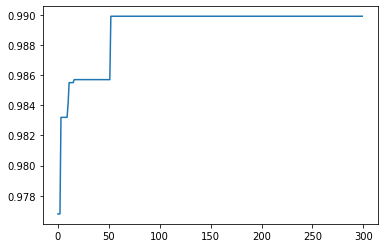

In [11]:
import matplotlib.pyplot as plt
plt.plot(df['cummax'])